In [1]:
# visualize RV



In [2]:
from pcdet.datasets.kitti.kitti_dataset import KittiDataset
from pcdet.config import cfg, cfg_from_yaml_file
from pcdet.utils import common_utils
from pathlib import Path

cfg_from_yaml_file('cfgs/kitti_models/sphoxelnet.yaml', cfg)

# args, cfg = parse_config()


logger = common_utils.create_logger()
logger.info(
    '-----------------Quick Demo of OpenPCDet-------------------------')
dataset = KittiDataset(
    dataset_cfg=cfg.DATA_CONFIG, class_names=cfg.CLASS_NAMES, training=False,
    root_path=Path("../data/kitti/"), logger=logger
)
logger.info(f'Total number of samples: \t{len(dataset)}')

2020-08-07 17:55:37,045   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-08-07 17:55:37,048   INFO  Loading KITTI dataset
2020-08-07 17:55:37,198   INFO  Total samples for KITTI dataset: 3769
2020-08-07 17:55:37,199   INFO  Total number of samples: 	3769


In [3]:
dataset[0]

{'points': array([[ 4.9520e+01,  2.2668e+01,  2.0510e+00,  0.0000e+00],
        [ 4.9428e+01,  2.2814e+01,  2.0500e+00,  0.0000e+00],
        [ 4.8096e+01,  2.2658e+01,  2.0070e+00,  5.0000e-02],
        ...,
        [ 6.3200e+00, -5.1000e-02, -1.6500e+00,  2.1000e-01],
        [ 6.3130e+00, -3.1000e-02, -1.6480e+00,  2.3000e-01],
        [ 6.3030e+00, -1.1000e-02, -1.6450e+00,  1.6000e-01]],
       dtype=float32),
 'frame_id': '000001',
 'calib': <pcdet.utils.calibration_kitti.Calibration at 0x7fdc0e516310>,
 'gt_boxes': array([[ 5.8780804e+01,  1.6559633e+01, -8.4111100e-01,  3.6900001e+00,
          1.8700000e+00,  1.6700000e+00, -3.1407964e+00,  1.0000000e+00],
        [ 4.6125271e+01, -4.5720658e+00, -3.1538725e-02,  2.0200000e+00,
          6.0000002e-01,  1.8600000e+00, -2.0796418e-02,  3.0000000e+00]],
       dtype=float32),
 'use_lead_xyz': True,
 'rangeV': <sphconv.rangevoxel.RangeVoxel at 0x7fdb7fbf8fd0>,
 'image_shape': array([ 375, 1242], dtype=int32)}

In [4]:
dataset[0]['rangeV'].feature.shape


torch.Size([1, 4, 1, 41, 512])

In [5]:
range_image = dataset[5]['rangeV'].feature[0,3 ,0]
range_image.shape
import torchvision.transforms.functional as F
range_image = F.resize(F.to_pil_image(range_image), (41*2,512))


In [6]:
import matplotlib.pyplot as plt

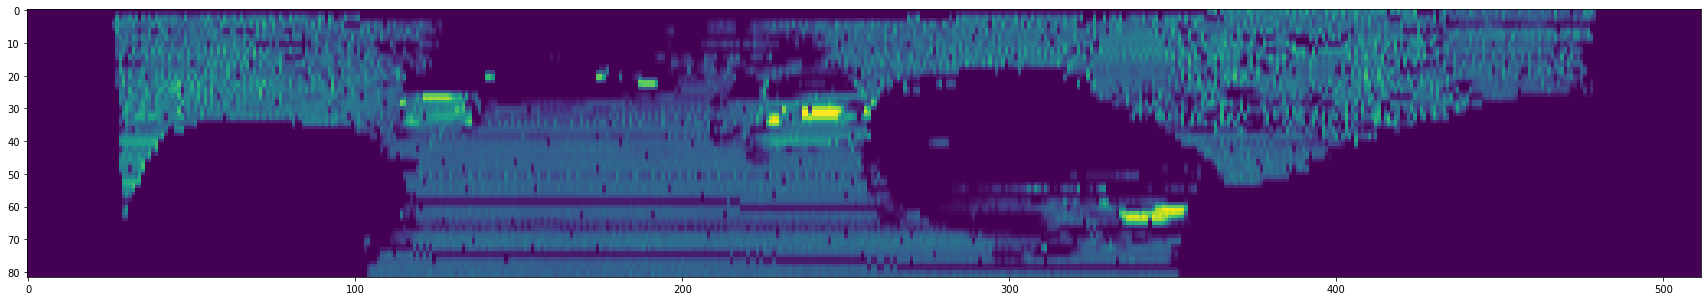

In [7]:
plt.figure(figsize=(30,30))
plt.imshow(range_image)

In [8]:
type(range_image)

PIL.Image.Image

In [9]:
dataset[5]['frame_id']

'000008'

In [10]:
# check rv's bev
rv = dataset[5]['rangeV']
bev = torch.tensor([rv.])

SyntaxError: invalid syntax (<ipython-input-10-89a40e2bb2bc>, line 3)

In [12]:
points = dataset[5]['points']

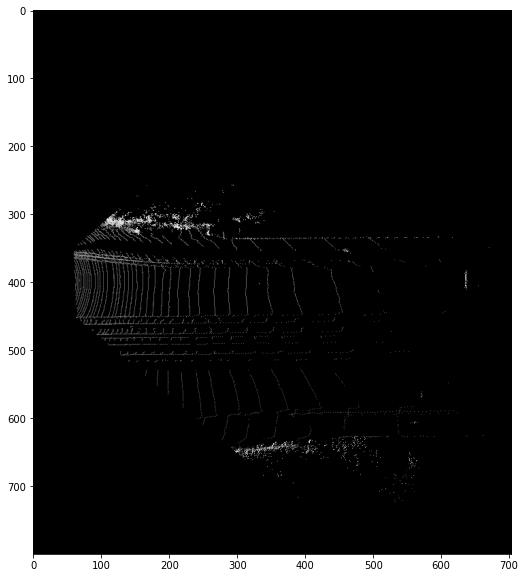

In [19]:
from visual_utils.vis import kitti_vis
import numpy as np
bev_map = kitti_vis(dataset[0]['points'])
plt.figure(figsize=(10,10))
plt.imshow(bev_map)

In [ ]:
def rv_bev(rv:RangeVoxel):
    """return bev image"""
    
    
